In [7]:
import pandas as pd
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from os.path import join
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [8]:
with open(join('data', 'census.pkl'), 'rb') as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

X_train.shape, X_test.shape

((27676, 108), (4885, 108))

In [9]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore.fit(X_train, y_train);

In [10]:
previsoes = arvore.predict(X_test)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [11]:
y_test

22278     <=50K
8950      <=50K
7838      <=50K
16505     <=50K
19140      >50K
          ...  
28592     <=50K
17008     <=50K
25123     <=50K
21036     <=50K
13998     <=50K
Name: income, Length: 4885, dtype: object

In [12]:
accuracy_score(y_test, previsoes)

0.8104401228249745

[[3227  466]
 [ 460  732]]


0.8104401228249745

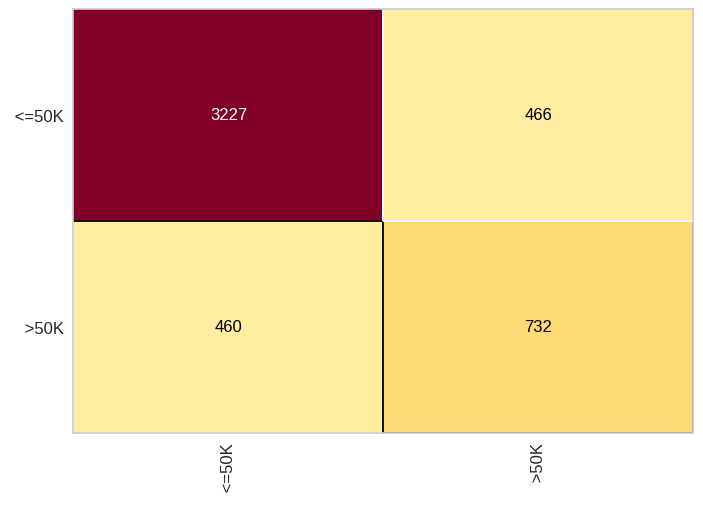

In [13]:
from yellowbrick.classifier import ConfusionMatrix

print(confusion_matrix(y_test, previsoes))

cm = ConfusionMatrix(arvore)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [14]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



In [15]:
arvore.classes_

array([' <=50K', ' >50K'], dtype=object)